# K-means Clustering using Handwritten Digits from the MNIST Dataset

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

### To plot pretty figures inline in the notebook

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [5]:
print(tf.__version__)
print(np.__version__)
print(matplotlib.__version__)

1.3.0
1.13.1
2.0.2


### Store the MNIST data in "mnist_data/" in the current working directory

In [6]:
mnist = input_data.read_data_sets("mnist_data/")

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [7]:
# Start with a 100 images in the training set and then try 2000
training_digits, training_labels = mnist.train.next_batch(2000)

test_digits, test_labels = mnist.test.next_batch(5)

### Groups the entities passed in by cluster
   * Takes in two 1-D arrays of cluster ids and original entities
   * Returns a list of lists where all entities in one cluster are in one nested list 

In [9]:
def group_by_cluster(predicted_cluster_ids, original_entities):
    cluster_groups = [[] for i in range(10)]
    
    for i in range(len(predicted_cluster_ids)):
        cluster_id = predicted_cluster_ids[i]
        cluster_groups[cluster_id].append(original_entities[i])
    
    return cluster_groups

### Displays a digit inline on screen
* Takes in a 1-D array of 784 pixels representing an image

In [10]:
def display_digit(digit):
    plt.imshow(digit.reshape(28, 28), cmap="Greys", interpolation='nearest')

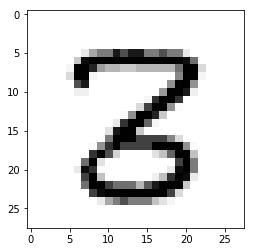

In [11]:
display_digit(training_digits[0])

In [14]:
from tensorflow.contrib.learn.python.learn.estimators import kmeans

from tensorflow.contrib.factorization.python.ops import clustering_ops

### Input function to generate features and labels for the estimator

*This is an unsupervised algorithm so we generate only the features, labels is set to None*

* The function takes in an array of MNIST images
* Converts this array to a Tensor
* Returns a tuple of features and labels

In [15]:
def input_fn(digits):
    input_t = tf.convert_to_tensor(digits, dtype=tf.float32)
    
    return (input_t, None)

### TensorFlow documentation

https://www.tensorflow.org/api_docs/python/tf/contrib/learn/KMeansClustering

__init__(
    num_clusters,
    model_dir=None,
    initial_clusters=RANDOM_INIT,
    distance_metric=SQUARED_EUCLIDEAN_DISTANCE,
    random_seed=0,
    use_mini_batch=True,
    mini_batch_steps_per_iteration=1,
    kmeans_plus_plus_num_retries=2,
    relative_tolerance=None,
    config=None
)

In [16]:
k_means_estimator = kmeans.KMeansClustering(num_clusters=10)

# Start with a 1000 steps and then try 10000
fit = k_means_estimator.fit(input_fn=lambda: input_fn(training_digits), steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11cafff10>, '_model_dir': '/var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmp5M2bJK', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': None, '_save_summary_steps': 100, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': ''}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmp5M2bJK/model.ckpt.
INFO:tensorflow:loss = 144308.0, step = 1
INFO:tensorflow:global_step/sec: 284.079
INFO:tensorflow:loss = 79251.9, step = 1

In [17]:
clusters = k_means_estimator.clusters()

### Plot the image representations of the centroids of the clusters
*Note that these may not be actual images in our training data*

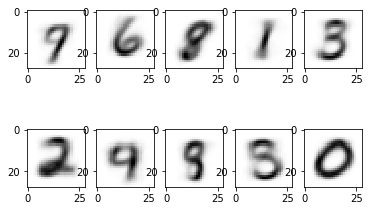

In [20]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    display_digit(clusters[i])

### Manually identify the image corresponding to each cluster

*Note that your cluster labels need not be unique. If some digits are over-represented in the training dataset then you might have more than one cluster labelled with that digit*

In [21]:
cluster_labels = [7, 6, 8, 1, 3, 2, 9, 8, 8, 0]

### Display the images which we are going to test
* We'll predict what the labels of these images are

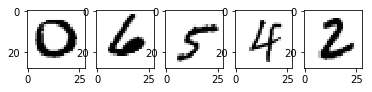

In [22]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    display_digit(test_digits[i])

### Predict clusters for each of the images in the test data

In [23]:
predict = k_means_estimator.predict(input_fn=lambda: input_fn(test_digits), as_iterable=False)
predict

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmp5M2bJK/model.ckpt-1000


{'all_scores': array([[ 132.34635925,  101.32859802,  118.14146423,  125.25869751,
           97.40529633,   85.19303894,  110.75066376,  128.5990448 ,
           95.13679504,   53.3062973 ],
        [  86.36109924,   37.89138794,   82.91835022,   97.28290558,
           84.71691132,   66.86811829,   82.81247711,   87.62355042,
           96.58830261,   72.23059845],
        [  50.5413208 ,   72.8505249 ,   41.75234222,   51.98039246,
           73.8536911 ,   77.04344177,   72.86149597,   63.92882156,
           84.09811401,   86.15518188],
        [  46.16286469,   47.87290192,   51.74154663,   61.10998535,
           59.02696991,   54.38568497,   40.41819   ,   40.186306  ,
           66.98754883,   86.67405701],
        [  98.37063599,   67.73192596,   70.27310181,   62.08139801,
           48.08563995,   52.36715317,   94.09851074,   67.70155334,
           56.65057373,   84.39874268]], dtype=float32),
 'cluster_idx': array([9, 1, 2, 7, 4])}

### Compare how good the predictions were
* Display the digit we associate with each cluster
* Display the actual image for each test data (so we know the actual digit)

*Notice that this performs really badly*

[0, 6, 8, 8, 3]


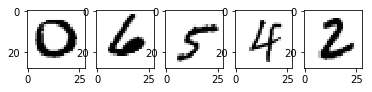

In [25]:
print([cluster_labels[i] for i in predict['cluster_idx']])

for i in range(5):
    plt.subplot(1, 5, i + 1)
    display_digit(test_digits[i])

## <span style="color:blue"> Measuring how good our predictions are using image labels </span>
* Accuracy of the predictions on the training dataset, using **manually assigned labels** to each cluster
* Measuring the **mean** and **standard deviation** of the image labels in each cluster *(mean should be a unique digit from 0-9 and standard deviation should be 0 for perfect clustering)*
* Measure the **mode** of the image labels in each cluster *(the mode should be a unique digit from 0-9)*

### We've not used it yet but we still have the labels for each of our training (and test) images

In [26]:
training_labels[:5]

array([3, 3, 9, 5, 8], dtype=uint8)

### Predict clusters for our training data
* Use this to group all the training data by cluster
* We'll use the labels we previously assigned manually to each cluster (by guessing what digit each centroid's image represented)

In [27]:
predict_train = k_means_estimator.predict(input_fn=lambda: input_fn(training_digits), as_iterable=False)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmp5M2bJK/model.ckpt-1000


### Get the predicted labels for each of training dataset
* We've manually assigned a label to each cluster by observing the centroid image
* Once we know which cluster each image belongs to the label for that cluster becomes the prediction for the training data

In [30]:
def display_accuracy(cluster_labels, cluster_idx, actual_labels):
    predict_labels = [cluster_labels[i] for i in cluster_idx]
    num_accurate_predictions = (list(predict_labels == actual_labels)).count(True)

    print("Number of accurate predictions: ", num_accurate_predictions)
    
    pctAccuracy = float(num_accurate_predictions) / float(len(actual_labels))

    print("% accurate predictions: ", pctAccuracy)


In [31]:
display_accuracy(cluster_labels, predict_train['cluster_idx'], training_labels)

Number of accurate predictions:  1085
% accurate predictions:  0.5425


### Get the mean and standard deviation of the image labels in each cluster

A good clustering will have

* A unique mean for each cluster and each mean will be close to one of the digits 0-9
* A standard deviation of 0 or close to 0

In [35]:
def display_cluster_mean_std_dev(training_cluster_ids, training_labels):
    cluster_grouped_labels = group_by_cluster(training_cluster_ids, training_labels)

    mean = [[] for i in range(10)]
    std_dev = [[] for i in range(10)]

    for i in range(10):
        mean[i] = np.mean(cluster_grouped_labels[i])
        std_dev[i] = np.std(cluster_grouped_labels[i])
        
    print("Mean: ", mean)
    print("Standard deviation: ", std_dev)
    
display_cluster_mean_std_dev(predict_train['cluster_idx'], training_labels)

Mean:  [6.7857142857142856, 5.4748603351955305, 5.978494623655914, 2.3633540372670807, 3.7719298245614037, 2.1133333333333333, 5.8798076923076925, 6.176211453744493, 4.0149253731343286, 0.14685314685314685]
Standard deviation:  [1.9283068601596518, 1.5725239853192563, 2.5588912863899655, 2.322244294663808, 1.9104288474162863, 0.62755256530606462, 2.2574611253017229, 2.5386453964032443, 2.4616008461515682, 0.93836669557120911]


### Get the mode of the image labels in each cluster
A good clustering will have
* A unique mode for each cluster and each mode will be one of the digits 0-9

In [37]:
from scipy import stats
def get_cluster_mode(training_cluster_ids, training_labels):
    cluster_group = group_by_cluster(training_cluster_ids, training_labels)

    mode = [[] for i in range(10)]

    # The mode of the image labels in each cluster
    for i in range(10):
        mode[i] = stats.mode(cluster_group[i])[0][0]
    
    return mode
    
get_cluster_mode(predict_train['cluster_idx'], training_labels)

[7, 6, 8, 1, 3, 2, 4, 8, 3, 0]

In [39]:
print(cluster_labels)

[7, 6, 8, 1, 3, 2, 9, 8, 8, 0]


## <span style="color:blue"> Will predictions improve if we use actual images rather than labels? </span>
* Find the average image by finding the mean of actual pixel values, this should be the **same as the cluster centers**
* Find the mode of the image by finding the mode of the actual pixel values, check if this gives us better predictions

In [40]:
def get_cluster_image_mean(training_cluster_ids, training_digits):
    cluster_group = group_by_cluster(training_cluster_ids, training_digits)

    image_mean = []

    for i in range(10):
        avg_img = np.mean(cluster_group[i], axis = 0)
        image_mean.append(avg_img)
        
    return image_mean

image_mean = get_cluster_image_mean(predict_train['cluster_idx'], training_digits)

### Check how the average image looks
This should be the same image as when we displayed the cluster centers

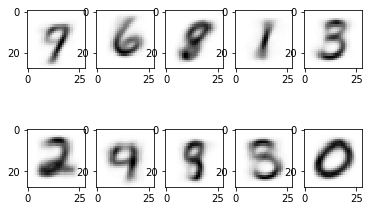

In [41]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    display_digit(image_mean[i])

### Plot the cluster center images side-by-side with the average image we calculated pixel by pixel

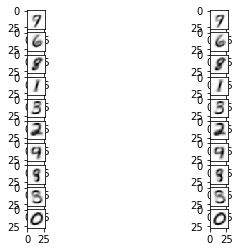

In [42]:
for i in range(10):
    plt.subplot(10, 2, i*2 + 1)
    display_digit(image_mean[i])
    plt.subplot(10, 2, i*2 + 2)
    display_digit(clusters[i])

### Calculate the mode value, pixel-by-pixel for images in each cluster

In [43]:
from scipy import stats
def get_cluster_image_mode(training_cluster_ids, training_digits):
    cluster_group = group_by_cluster(training_cluster_ids, training_digits)

    image_mode = []

    for i in range(10):
        mode_img = stats.mode(cluster_group[i], axis=0)[0][0]
        image_mode.append(mode_img)
        
    return image_mode

image_mode = get_cluster_image_mode(predict_train['cluster_idx'], training_digits)

### Plot the images we get as a result of the mode operation
Note that there is no discernable pattern, clearly using the image pixels itself does not improve the quality of the prediction

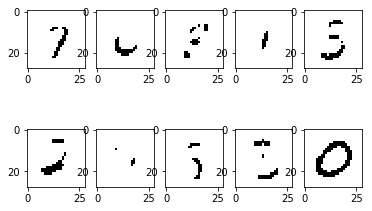

In [44]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    display_digit(image_mode[i])